## **Data Engineering Task Notebook**

This notebook is designed to test you through various Data Engineering tasks using the Online Retail II dataset. The tasks will help you develop essential skills in data cleaning, feature engineering, and transforming raw data into valuable insights. You'll explore tasks like handling missing values, aggregating data, creating new features, and performing data joins to simulate real-world data workflows. These tasks will prepare you for more advanced data manipulation and analysis, enhancing your ability to work with large, complex datasets.

# **About the Dataset**
This Online Retail II dataset contains transactional data from a UK-based online retailer selling unique gift-ware. The data covers transactions that occurred between December 1, 2009 and December 9, 2011. The retailer primarily serves both individual customers and wholesalers. The products sold by the company are all-occasion gift items, including home décor, kitchenware, and other unique items.

The dataset includes detailed information on each transaction, providing valuable insights into customer behavior, sales trends, and product performance over time.



## **What can be done with this dataset?**

**Customer Behavior Analysis:** Explore purchasing patterns, repeat customers, and sales volume across different customer segments.

**Sales Forecasting:** Predict future sales by analyzing past transactions, including seasonal trends and demand fluctuations.

**Market Segmentation:** Identify customer groups based on purchase history and demographic data (e.g., by Country).

**Product Performance:** Analyze which products are bestsellers and which have low turnover, and how prices influence sales.

**Time Series Analysis:** Study trends over time, including hourly, daily, and monthly sales volumes, and identify peak shopping periods.

**Anomaly Detection:** Detect potential fraudulent transactions, cancellations, or unusually high sales activity.
Association Rule Mining: Discover products that are often purchased together and identify cross-sell opportunities.



## **Key Attributes in the Dataset:**

**InvoiceNo:** Unique transaction identifier (with cancellations indicated by 'C' prefix).

**StockCode:** Unique product code for each item sold.

**Description:** Name of the product/item sold.

**Quantity:** Quantity of each product sold in the transaction
.
**InvoiceDate:** Date and time of the transaction.

**UnitPrice:** Price per unit of the product.

**CustomerID:** Unique identifier for each customer.

**Country:** The country where the customer resides.

This dataset is a great resource for learning and practicing various data analysis, machine learning, and business intelligence techniques.

## **Exercise**
Complete the following tasks:
1. Load the [dataset](https://www.kaggle.com/datasets/lakshmi25npathi/online-retail-dataset) from Kaggle.
2. Visualize the dataset and it's structure using appropriate libraries and plots.
3. Do some basic cleaning to handle missing values
4. Create the following features:
  *   Revenue
  *   DayOfWeek: to analyze sales trends by weekdays.
  *   TotalRevenue for each CustomerID
  *   Most popular product based on Revenue.
  *   Ordersize by summing Quantity for each InvoiceNo
5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".
7. Wrap all fo the above into an ETL pipeline.

Extra tasks for practicing GroupBy
1. Join CustomerID with TotalRevenue to create Customer_Revenue column
2. Group by Country to find total revenue, total customers, and average order size per country.
3. Group by StockCode to find top-selling products by quantity.
4. Group by CustomerID to calculate the average order value or frequency of purchases.







             








#### first 3 look at them again later


In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [96]:
path = kagglehub.dataset_download("lakshmi25npathi/online-retail-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Jlo\.cache\kagglehub\datasets\lakshmi25npathi\online-retail-dataset\versions\1


In [97]:
dataset_path = path

files = os.listdir(dataset_path)
print(files)


['online_retail_II.xlsx']


In [98]:
file_path = path + "/online_retail_II.xlsx"

df = pd.read_excel(file_path)

In [99]:
print(df.head())

  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [100]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None


In [101]:
print(df.isnull().sum())

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64


In [102]:
# Fill missing 'Description' using the most common value per 'StockCode'
df['Description'] = df.groupby('StockCode')['Description'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

#Drop rows where 'Customer ID' is missing
df = df.dropna(subset=['Customer ID'])

print(df.isnull().sum())


Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64


In [103]:
print(df.duplicated().sum())

6771


In [104]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


#### 2. Visualize the dataset and it's structure using appropriate libraries and plots.


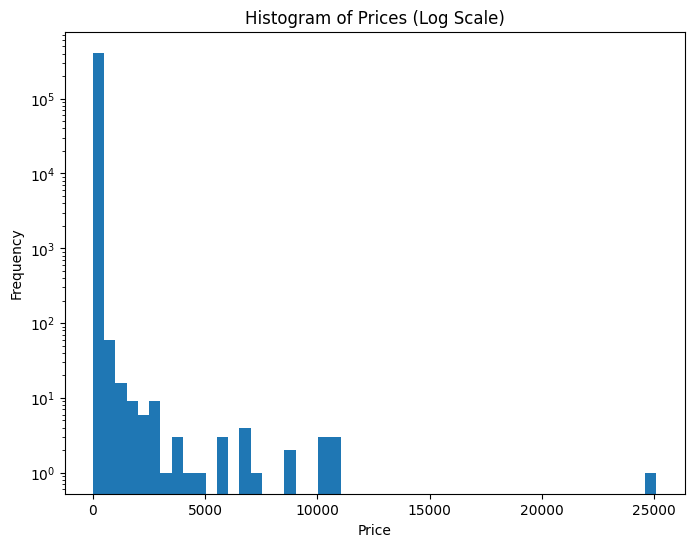

In [105]:
plt.figure(figsize=(8,6))
plt.hist(df['Price'], bins=50, log=True)  # Adjust bins for better distribution
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.title("Histogram of Prices (Log Scale)")
plt.show()


In [106]:
country_counts = df['Country'].value_counts()
country_counts

Country
United Kingdom          372705
EIRE                      8705
Germany                   8120
France                    5692
Netherlands               2768
Spain                     1271
Switzerland               1187
Belgium                   1053
Portugal                  1023
Channel Islands            906
Sweden                     882
Italy                      729
Australia                  654
Cyprus                     546
Austria                    537
Greece                     517
Denmark                    428
Norway                     369
Finland                    354
United Arab Emirates       318
Unspecified                280
USA                        244
Japan                      224
Poland                     194
Malta                      172
Lithuania                  154
Singapore                  117
Canada                      77
Thailand                    76
Israel                      74
Iceland                     71
RSA                         65


<BarContainer object of 37 artists>

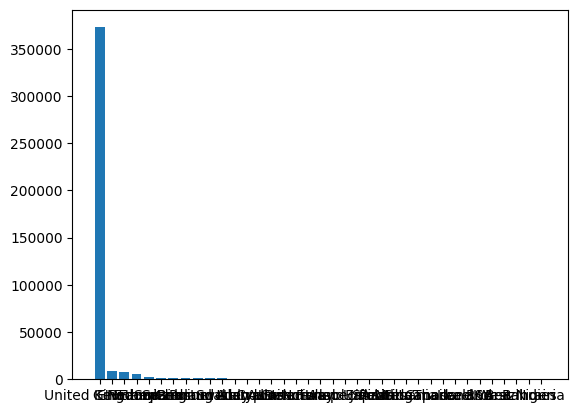

In [107]:

plt.bar(country_counts.index, country_counts.values)

c:\Users\Jlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\regression.py:315: RuntimeWarning: divide by zero encountered in log
  grid = np.c_[np.ones(len(grid)), np.log(grid)]
c:\Users\Jlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\regression.py:318: RuntimeWarning: divide by zero encountered in log
  _x = np.c_[_x[:, 0], np.log(_x[:, 1])]
c:\Users\Jlo\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\lib\_nanfunctions_impl.py:1620: RuntimeWarning: All-NaN slice encountered
  return fnb._ureduce(a,


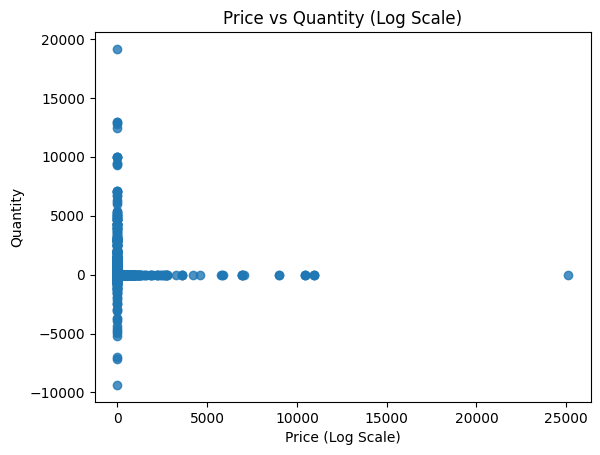

In [108]:
sns.regplot(x=df['Price'], y=df['Quantity'], logx=True)
plt.xlabel("Price (Log Scale)")
plt.ylabel("Quantity")
plt.title("Price vs Quantity (Log Scale)")
plt.show()

In [109]:
cor = df[['Price', 'Quantity']].corr()
print(cor)

             Price  Quantity
Price     1.000000 -0.004136
Quantity -0.004136  1.000000


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Description  410763 non-null  object        
 3   Quantity     410763 non-null  int64         
 4   InvoiceDate  410763 non-null  datetime64[ns]
 5   Price        410763 non-null  float64       
 6   Customer ID  410763 non-null  float64       
 7   Country      410763 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.2+ MB


#### 4. Create the following features:
*   Revenue
*   DayOfWeek: to analyze sales trends by weekdays.
*   TotalRevenue for each CustomerID
*   Most popular product based on Revenue.
*   Ordersize by summing Quantity for each InvoiceNo

#### Revenue

In [111]:
df['revenue'] = df['Price']*df['Quantity']


#### DayOfWeek: to analyze sales trends by weekdays.

In [112]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()  # Get weekday name (e.g., Monday, Tuesday)
df['DayOfWeek_Num'] = df['InvoiceDate'].dt.weekday  # Get weekday number (Monday=0, Sunday=6)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Invoice        410763 non-null  object        
 1   StockCode      410763 non-null  object        
 2   Description    410763 non-null  object        
 3   Quantity       410763 non-null  int64         
 4   InvoiceDate    410763 non-null  datetime64[ns]
 5   Price          410763 non-null  float64       
 6   Customer ID    410763 non-null  float64       
 7   Country        410763 non-null  object        
 8   revenue        410763 non-null  float64       
 9   DayOfWeek      410763 non-null  object        
 10  DayOfWeek_Num  410763 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(5)
memory usage: 36.0+ MB


In [114]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,revenue,DayOfWeek_Num
count,410763.000000,410763,410763.000000,410763.000000,410763.000000,410763.000000
mean,12.923735,2010-06-30 19:56:14.853674752,3.908358,15353.621857,20.242465,2.671718
min,-9360.000000,2009-12-01 07:45:00,0.000000,12346.000000,-25111.090000,0.000000
25%,2.000000,2010-03-26 09:46:00,1.250000,13979.000000,4.500000,1.000000
50%,5.000000,2010-07-08 15:09:00,1.950000,15311.000000,11.800000,3.000000
75%,12.000000,2010-10-14 12:32:00,3.750000,16797.000000,19.500000,4.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,15818.400000,6.000000
std,102.039550,NaN,71.714794,1681.657665,100.710825,1.967112


#### TotalRevenue for each CustomerID

In [115]:
customer_total_revenue = df.groupby('Customer ID')['revenue'].transform('sum')
print(customer_total_revenue)


0         1187.08
1         1187.08
2         1187.08
3         1187.08
4         1187.08
           ...   
525456     724.26
525457     724.26
525458     724.26
525459     724.26
525460     724.26
Name: revenue, Length: 410763, dtype: float64


In [116]:
df['customer_total_revenue'] = customer_total_revenue

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Invoice                 410763 non-null  object        
 1   StockCode               410763 non-null  object        
 2   Description             410763 non-null  object        
 3   Quantity                410763 non-null  int64         
 4   InvoiceDate             410763 non-null  datetime64[ns]
 5   Price                   410763 non-null  float64       
 6   Customer ID             410763 non-null  float64       
 7   Country                 410763 non-null  object        
 8   revenue                 410763 non-null  float64       
 9   DayOfWeek               410763 non-null  object        
 10  DayOfWeek_Num           410763 non-null  int32         
 11  customer_total_revenue  410763 non-null  float64       
dtypes: datetime64[ns](1), float64(4), i

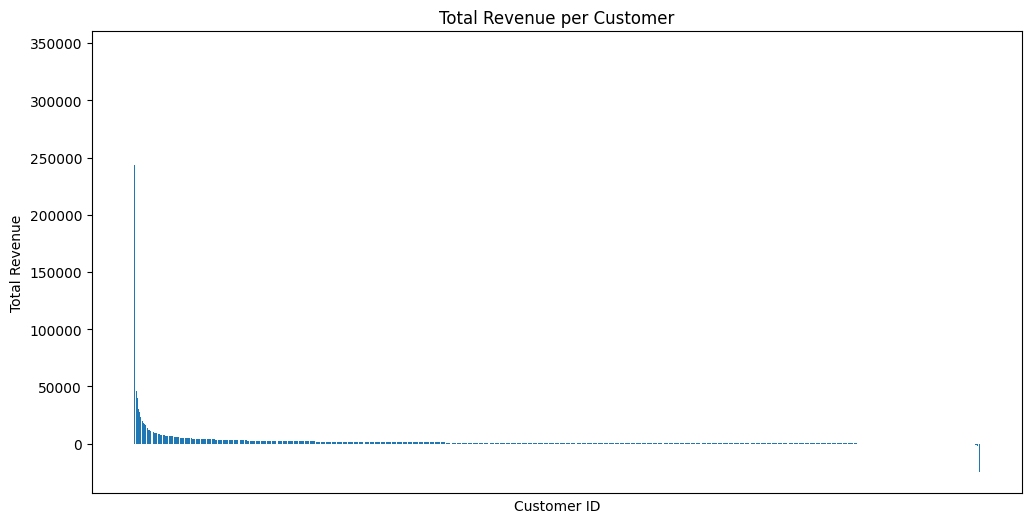

In [118]:
# Create a DataFrame with unique Customer IDs and their total revenue
customer_revenue_unique = df[['Customer ID']].copy()
customer_revenue_unique['TotalRevenue'] = customer_total_revenue
customer_revenue_unique = customer_revenue_unique.drop_duplicates()

# Sort by total revenue
customer_revenue_unique = customer_revenue_unique.sort_values(by='TotalRevenue', ascending=False)

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(customer_revenue_unique['Customer ID'].astype(str), customer_revenue_unique['TotalRevenue'])
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Customer')
plt.xticks([], [])  # Hide x-axis labels if too many customers
plt.show()


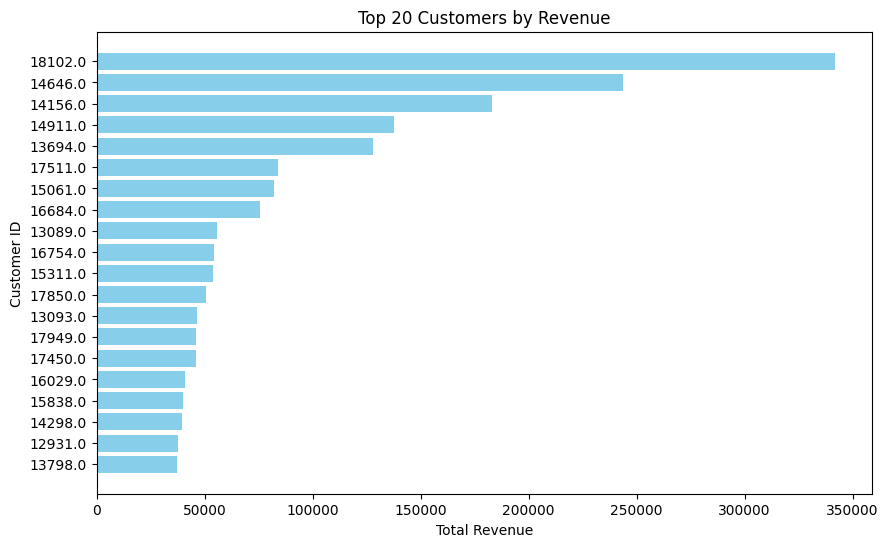

In [119]:
# Keep only the top 20 customers by revenue
top_customers = customer_revenue_unique.head(20)

# Plot horizontal bar chart for better readability
plt.figure(figsize=(10, 6))
plt.barh(top_customers['Customer ID'].astype(str), top_customers['TotalRevenue'], color='skyblue')

# Labels and title
plt.xlabel('Total Revenue')
plt.ylabel('Customer ID')
plt.title('Top 20 Customers by Revenue')

# Show the plot
plt.gca().invert_yaxis()  # Highest revenue at the top
plt.show()


#### Most Popular Product based on Revenue

I have chosen to do most popular product based on revenue as category low->high. done this for now.
might change or add a different form of this later depening on the usecase for this.

In [120]:
product_revenue = df.groupby('Description')['revenue'].sum().reset_index()
product_revenue['ProductCategory'] = pd.qcut(product_revenue['revenue'], q=3, labels=['Low', 'Medium', 'High'])
df = df.merge(product_revenue[['Description', 'ProductCategory']], on='Description', how='left')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue,DayOfWeek,DayOfWeek_Num,customer_total_revenue,ProductCategory
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,Tuesday,1,1187.08,High
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,1,1187.08,High
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,1,1187.08,High
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,Tuesday,1,1187.08,High
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,Tuesday,1,1187.08,High


#### 5. Ordersize by summing Quantity for each InvoiceNo

In [121]:
df['OrderSize'] = df.groupby('Invoice')['Quantity'].transform('sum')

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410763 entries, 0 to 410762
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Invoice                 410763 non-null  object        
 1   StockCode               410763 non-null  object        
 2   Description             410763 non-null  object        
 3   Quantity                410763 non-null  int64         
 4   InvoiceDate             410763 non-null  datetime64[ns]
 5   Price                   410763 non-null  float64       
 6   Customer ID             410763 non-null  float64       
 7   Country                 410763 non-null  object        
 8   revenue                 410763 non-null  float64       
 9   DayOfWeek               410763 non-null  object        
 10  DayOfWeek_Num           410763 non-null  int32         
 11  customer_total_revenue  410763 non-null  float64       
 12  ProductCategory         410763

In [123]:
print(df['OrderSize'].unique())

[ 166   60  193 ... 2154  675 -104]


Negative order sizes ?????

In [124]:
print(df[df['Quantity'] < 0])

        Invoice StockCode                       Description  Quantity  \
178     C489449     22087          PAPER BUNTING WHITE LACE       -12   
179     C489449    85206A      CREAM FELT EASTER EGG BASKET        -6   
180     C489449     21895     POTTING SHED SOW 'N' GROW SET        -4   
181     C489449     21896                POTTING SHED TWINE        -6   
182     C489449     22083        PAPER CHAIN KIT RETRO SPOT       -12   
...         ...       ...                               ...       ...   
410390  C538123     22956          36 FOIL HEART CAKE CASES        -2   
410391  C538124         M                            Manual        -4   
410392  C538124     22699  ROSES REGENCY TEACUP AND SAUCER         -1   
410393  C538124     22423          REGENCY CAKESTAND 3 TIER        -1   
410586  C538164    35004B       SET OF 3 BLACK FLYING DUCKS        -1   

               InvoiceDate  Price  Customer ID         Country  revenue  \
178    2009-12-01 10:33:00   2.95      16321.0  

Might be do to returns ?

#### 5. Apply a lambda function to:
  * Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").
  * Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added
  * Categorize transactions as "Small", "Medium", or "Large" based on Revenue.
  * **Detect Seasonal Items:** Flag items as "Christmas"-themed if the description contains relevant words.
  * Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.
  *  **Identify Multi-Item Invoices:** Flag invoices with multiple unique items as "Multi-Item Order".

##### Segment customers into tiers based on TotalRevenue (e.g., "High", "Medium", "Low").

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410763 entries, 0 to 410762
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Invoice                 410763 non-null  object        
 1   StockCode               410763 non-null  object        
 2   Description             410763 non-null  object        
 3   Quantity                410763 non-null  int64         
 4   InvoiceDate             410763 non-null  datetime64[ns]
 5   Price                   410763 non-null  float64       
 6   Customer ID             410763 non-null  float64       
 7   Country                 410763 non-null  object        
 8   revenue                 410763 non-null  float64       
 9   DayOfWeek               410763 non-null  object        
 10  DayOfWeek_Num           410763 non-null  int32         
 11  customer_total_revenue  410763 non-null  float64       
 12  ProductCategory         410763

In [126]:
low_threshold = df['customer_total_revenue'].quantile(0.33)
high_threshold = df['customer_total_revenue'].quantile(0.66)

# Apply lambda function to classify customers
CustomerTier = df['customer_total_revenue'].apply(
    lambda x: 'Low' if x <= low_threshold else ('Medium' if x <= high_threshold else 'High')
)

In [127]:
print(CustomerTier.value_counts())

customer_total_revenue
High      139227
Medium    135976
Low       135560
Name: count, dtype: int64


In [128]:
df['CustomerTier'] = CustomerTier

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410763 entries, 0 to 410762
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Invoice                 410763 non-null  object        
 1   StockCode               410763 non-null  object        
 2   Description             410763 non-null  object        
 3   Quantity                410763 non-null  int64         
 4   InvoiceDate             410763 non-null  datetime64[ns]
 5   Price                   410763 non-null  float64       
 6   Customer ID             410763 non-null  float64       
 7   Country                 410763 non-null  object        
 8   revenue                 410763 non-null  float64       
 9   DayOfWeek               410763 non-null  object        
 10  DayOfWeek_Num           410763 non-null  int32         
 11  customer_total_revenue  410763 non-null  float64       
 12  ProductCategory         410763

##### Extract key information from Description and add them as columns (e.g., presence of specific keywords like "Gift" or "Discount"). At least one extra column should be added

In [130]:
import re
df['Description'] = df['Description'].astype(str).str.lower()

# Remove punctuation and split words into lists
df['Tokenized_Words'] = df['Description'].apply(lambda x: re.findall(r'\b\w+\b', x))

# Flatten the list of all words in the column
all_words = [word for sublist in df['Tokenized_Words'] for word in sublist]

# Convert to DataFrame and count occurrences
word_freq_df = pd.Series(all_words).value_counts().reset_index()
word_freq_df.columns = ['Word', 'Frequency']

In [131]:
#from IPython.display import display

display(word_freq_df)

,Word,Frequency
0,set,40479
1,red,39763
2,bag,32268
3,heart,31325
4,of,29809
...,...,...
2137,5l,1
2138,ol,1
2139,hollyhock,1
2140,u,1


In [132]:
from nltk.stem import PorterStemmer

# Initialize the Porter Stemmer
stemmer = PorterStemmer()

# Apply stemming to all words
word_freq_df['Stemmed_Word'] = word_freq_df['Word'].apply(lambda x: stemmer.stem(x))

# Group by stemmed words and sum frequencies
stemmed_word_freq = word_freq_df.groupby('Stemmed_Word')['Frequency'].sum().reset_index()

# Display the most common stemmed words
display(stemmed_word_freq.sort_values(by='Frequency', ascending=False))


,Stemmed_Word,Frequency
1483,set,41438
1375,red,40147
819,heart,35979
132,bag,32621
1154,of,29809
...,...,...
1773,vacuum,1
27,25w,1
1761,u,1
1762,ubo,1


In [133]:
sale_words = ['sale', 'discount', 'offer', 'promo']
sale_word_freq = stemmed_word_freq[stemmed_word_freq['Stemmed_Word'].isin(sale_words)]
display(sale_word_freq)

,Stemmed_Word,Frequency
526,discount,97


In [134]:
# Define word groups using stemmed words
word_groups_stemmed = {
    'Sale': ['sale', 'discount', 'offer', 'promo', 'special', 'deal'],
    'Gift': ['gift', 'present', 'birthday', 'anniversari'],  # anniversary -> anniversari
    'Luxury': ['luxuri', 'premium', 'exclus', 'handmad']  # luxury -> luxuri, exclusive -> exclus
}

# Check which words exist in the stemmed word list
for group_name, words in word_groups_stemmed.items():
    matched_words = stemmed_word_freq[stemmed_word_freq['Stemmed_Word'].isin(words)]
    print(f"\nWords found for {group_name}:")
    display(matched_words)



Words found for Sale:


,Stemmed_Word,Frequency
526,discount,97



Words found for Gift:


,Stemmed_Word,Frequency
99,anniversari,15
197,birthday,5340
756,gift,4307
1327,present,269



Words found for Luxury:


,Stemmed_Word,Frequency
1326,premium,41


In [135]:
# Calculate total frequency for each group
group_frequencies_stemmed = {}

for group_name, words in word_groups_stemmed.items():
    group_frequencies_stemmed[group_name] = stemmed_word_freq[stemmed_word_freq['Stemmed_Word'].isin(words)]['Frequency'].sum()

# Display total frequencies for each group
print("\nTotal Frequency per Group:")
print(group_frequencies_stemmed)



Total Frequency per Group:
{'Sale': np.int64(97), 'Gift': np.int64(9931), 'Luxury': np.int64(41)}


In [136]:
# Function to check if any of the words from a group exist in a description
def contains_group_word(description, group_words):
    return 1 if any(word in str(description).lower() for word in group_words) else 0

# Apply the function for each group
for group_name, words in word_groups_stemmed.items():
    df[f'Has_{group_name}'] = df['Description'].apply(lambda x: contains_group_word(x, words))


In [137]:
print(df.describe())

            Quantity                    InvoiceDate          Price  \
count  410763.000000                         410763  410763.000000   
mean       12.923735  2010-06-30 19:56:14.853674752       3.908358   
min     -9360.000000            2009-12-01 07:45:00       0.000000   
25%         2.000000            2010-03-26 09:46:00       1.250000   
50%         5.000000            2010-07-08 15:09:00       1.950000   
75%        12.000000            2010-10-14 12:32:00       3.750000   
max     19152.000000            2010-12-09 20:01:00   25111.090000   
std       102.039550                            NaN      71.714794   

         Customer ID        revenue  DayOfWeek_Num  customer_total_revenue  \
count  410763.000000  410763.000000  410763.000000           410763.000000   
mean    15353.621857      20.242465       2.671718            10928.169183   
min     12346.000000  -25111.090000       0.000000           -25111.090000   
25%     13979.000000       4.500000       1.000000       

##### Categorize transactions as "Small", "Medium", or "Large" based on Revenue.

In [138]:
# Define revenue percentiles for categorization
low_threshold = df['revenue'].quantile(0.33)
high_threshold = df['revenue'].quantile(0.66)

# Apply lambda function to classify transactions
df['TransactionSize'] = df['revenue'].apply(
    lambda x: 'Small' if x <= low_threshold else ('Medium' if x <= high_threshold else 'Large')
)

# Display updated DataFrame
display(df[['Invoice', 'revenue', 'TransactionSize']].head(10))


,Invoice,revenue,TransactionSize
0,489434,83.4,Large
1,489434,81.0,Large
2,489434,81.0,Large
3,489434,100.8,Large
4,489434,30.0,Large
5,489434,39.6,Large
6,489434,30.0,Large
7,489434,59.5,Large
8,489435,30.6,Large
9,489435,45.0,Large


#### Flag items as "Christmas"-themed if the description contains relevant words.

In [141]:
christmas_keywords = ['christmas', 'xmas', 'noel', 'santa']

df['Is_Christmas_Item'] = df['Description'].apply(lambda x: 1 if any(word in str(x).lower() for word in christmas_keywords) else 0)

# Display updated DataFrame
display(df[['Description', 'Is_Christmas_Item']].head(10))


,Description,Is_Christmas_Item
0,15cm christmas glass ball 20 lights,1
1,pink cherry lights,0
2,white cherry lights,0
3,"record frame 7"" single size",0
4,strawberry ceramic trinket box,0
5,pink doughnut trinket pot,0
6,save the planet mug,0
7,fancy font home sweet home doormat,0
8,cat bowl,0
9,"dog bowl , chasing ball design",0


In [142]:
# Count the number of Christmas items
christmas_item_count = df['Is_Christmas_Item'].sum()

# Display the count
print(f"Total Christmas-themed items: {christmas_item_count}")


Total Christmas-themed items: 16055


#### Classify customers as "Loyal", "Occasional", or "One-time" based on the number of purchases.

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410763 entries, 0 to 410762
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Invoice                 410763 non-null  object        
 1   StockCode               410763 non-null  object        
 2   Description             410763 non-null  object        
 3   Quantity                410763 non-null  int64         
 4   InvoiceDate             410763 non-null  datetime64[ns]
 5   Price                   410763 non-null  float64       
 6   Customer ID             410763 non-null  float64       
 7   Country                 410763 non-null  object        
 8   revenue                 410763 non-null  float64       
 9   DayOfWeek               410763 non-null  object        
 10  DayOfWeek_Num           410763 non-null  int32         
 11  customer_total_revenue  410763 non-null  float64       
 12  ProductCategory         410763

<br>I start by looking at the number of prucheses per customer<br/>

count    4383.000000
mean       93.717317
std       201.805038
min         1.000000
25%        18.000000
50%        43.000000
75%       102.000000
max      5707.000000
Name: Purchase_Count, dtype: float64


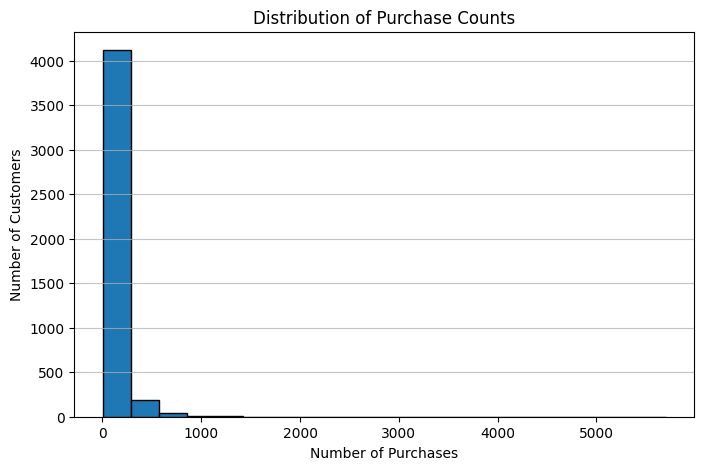

In [150]:


# Count the number of purchases per customer
purchase_counts = df.groupby('Customer ID').size().reset_index(name='Purchase_Count')

# Display summary statistics
print(purchase_counts['Purchase_Count'].describe())

# Plot the histogram
plt.figure(figsize=(8, 5))
plt.hist(purchase_counts['Purchase_Count'], bins=20, edgecolor='black')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.title('Distribution of Purchase Counts')
plt.grid(axis='y', alpha=0.75)
plt.show()


<br>I have chosen that the the loyal will be the top 50 procentile and the occasional will be the lower 50 excluding the onces who only have 1<br/>

In [ ]:

# Count the number of purchases per customer
purchase_counts = df.groupby('Customer ID').size().reset_index(name='Purchase_Count')

# Define thresholds based on percentiles
one_time_threshold = 1  # Customers with exactly 1 purchase
occasional_threshold = purchase_counts['Purchase_Count'].quantile(0.50)  # 50th percentile (43 purchases)

# Classify customers
purchase_counts['Customer_Type'] = purchase_counts['Purchase_Count'].apply(
    lambda x: 'One-time' if x == one_time_threshold else 
              ('Occasional' if x < occasional_threshold else 'Loyal')
)
purchase_counts

,Customer ID,Purchase_Count,Customer_Type
0,12346.0,45,Loyal
1,12347.0,71,Loyal
2,12348.0,20,Occasional
3,12349.0,107,Loyal
4,12351.0,21,Occasional
...,...,...,...
4378,18283.0,217,Loyal
4379,18284.0,29,Occasional
4380,18285.0,12,Occasional
4381,18286.0,70,Loyal


In [157]:
df = df.merge(purchase_counts[['Customer ID', 'Customer_Type']], on='Customer ID', how='left')

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410763 entries, 0 to 410762
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Invoice                 410763 non-null  object        
 1   StockCode               410763 non-null  object        
 2   Description             410763 non-null  object        
 3   Quantity                410763 non-null  int64         
 4   InvoiceDate             410763 non-null  datetime64[ns]
 5   Price                   410763 non-null  float64       
 6   Customer ID             410763 non-null  float64       
 7   Country                 410763 non-null  object        
 8   revenue                 410763 non-null  float64       
 9   DayOfWeek               410763 non-null  object        
 10  DayOfWeek_Num           410763 non-null  int32         
 11  customer_total_revenue  410763 non-null  float64       
 12  ProductCategory         410763

###  Identify Multi-Item Invoices: Flag invoices with multiple unique items as "Multi-Item Order".


In [160]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,revenue,DayOfWeek,...,ProductCategory,OrderSize,CustomerTier,Tokenized_Words,Has_Sale,Has_Gift,Has_Luxury,TransactionSize,Is_Christmas_Item,Customer_Type
0,489434,85048,15cm christmas glass ball 20 lights,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,Tuesday,...,High,166,Low,"[15cm, christmas, glass, ball, 20, lights]",0,0,0,Large,1,Loyal
1,489434,79323P,pink cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,...,High,166,Low,"[pink, cherry, lights]",0,0,0,Large,0,Loyal
2,489434,79323W,white cherry lights,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,Tuesday,...,High,166,Low,"[white, cherry, lights]",0,0,0,Large,0,Loyal
3,489434,22041,"record frame 7"" single size",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,Tuesday,...,High,166,Low,"[record, frame, 7, single, size]",0,0,0,Large,0,Loyal
4,489434,21232,strawberry ceramic trinket box,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,Tuesday,...,High,166,Low,"[strawberry, ceramic, trinket, box]",0,0,0,Large,0,Loyal


In [161]:
# Count the number of unique StockCodes per Invoice
invoice_item_counts = df.groupby('Invoice')['StockCode'].nunique().reset_index()
invoice_item_counts.rename(columns={'StockCode': 'Unique_Item_Count'}, inplace=True)

# Create a flag based on the number of unique items
invoice_item_counts['Order_Type'] = invoice_item_counts['Unique_Item_Count'].apply(
    lambda x: 'Multi-Item Order' if x > 1 else 'Single-Item Order'
)

# Merge the order type flag back into the original df
df = df.merge(invoice_item_counts[['Invoice', 'Order_Type']], on='Invoice', how='left')

In [164]:
order_type_counts = df['Order_Type'].value_counts()

C:\Users\Jlo\AppData\Local\Temp\ipykernel_17280\2296267669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=order_type_counts.index, y=order_type_counts.values, palette="coolwarm")


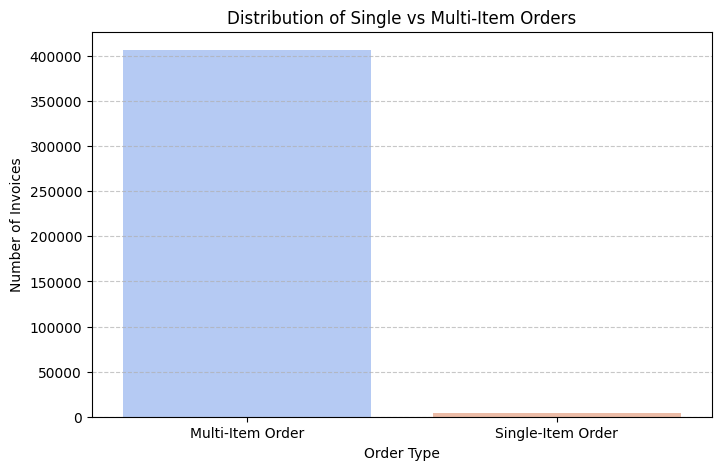

In [170]:
# --- Visualization ---
plt.figure(figsize=(8, 5))
sns.barplot(x=order_type_counts.index, y=order_type_counts.values, palette="coolwarm")

plt.xlabel("Order Type")
plt.ylabel("Number of Invoices")
plt.title("Distribution of Single vs Multi-Item Orders")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [172]:
order_type_counts.head()

Order_Type
Multi-Item Order     406508
Single-Item Order      4255
Name: count, dtype: int64

## 7. Wrap all fo the above into an ETL pipeline.